## Analysis of cell growth measured using optical density of cells at 600 nm. 

Experimental dataset was obtained looking at S. cerevisiae in EMM growth medium

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit

In [2]:
# loading dataset

data=np.loadtxt('data/cell_growth.txt',delimiter='\t')


In [3]:
######################################################
import matplotlib.font_manager as font_manager

plt.rcParams['lines.linewidth'] = 2 ;
plt.rc('axes', linewidth=1.80) ;
plt.rcParams["savefig.dpi"] = 340 ;
plt.rcParams.update({'font.size': 17}) ;
plt.rcParams["font.family"] = "Arial" 
plt.rcParams["figure.figsize"] = (8,5)
######################################################

### Fit function
We use logistic function to model the data. This function has three parameters : $L$ which is the max value, $x_{0}$ which governs the x value at half y and $k$ which explains the rise speed.

$y=f(x) = \frac{L}{(1+e^{-k*(x-x0)})}  $

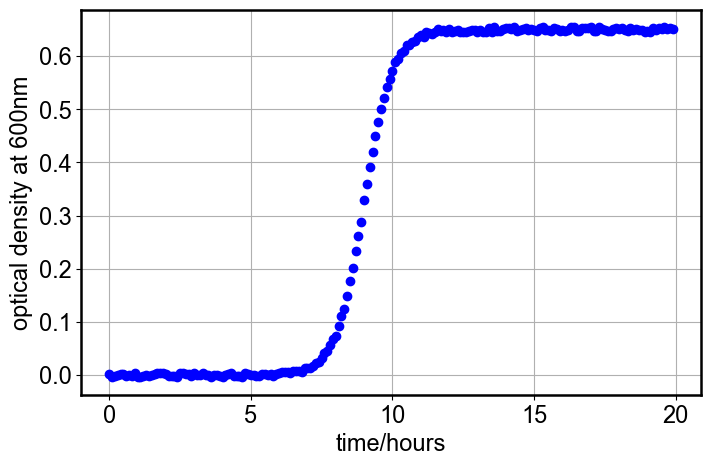

In [4]:
#-----------------
def func(x, x0, L, K):
    r=-K*(x-x0)
    den=1+np.exp(r)
    return(L/den)
#-----------------
time= data[:,0]
optical_density=data[:,1]
plt.plot(time,optical_density, 'o', color='b')
#plt.grid()

plt.xlabel('time/hours')
plt.ylabel('optical density at 600nm')
plt.grid()


In [5]:
# curve fitting the dataset

popt, pcov = curve_fit(func,time,optical_density)
print('optimized parameters : ', popt)

#generate fit value on a finely spaced xaxis
x_fine = np.linspace(0, 20, 200)
fit_y = func(x_fine, popt[0], popt[1], popt[2] )
#---------------

optimized parameters :  [8.9982435  0.64989645 1.99741562]


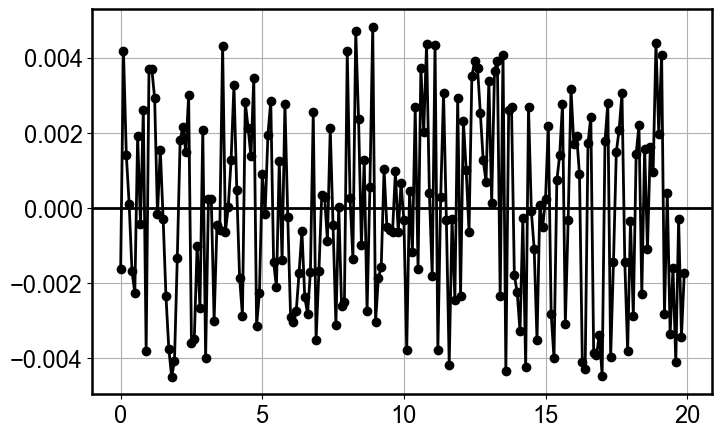

In [6]:
# compute residual
fit_y_at_original_x = func(time, popt[0], popt[1], popt[2] )
residual = fit_y_at_original_x - optical_density

plt.plot(time, residual, 'o-', color='black' )
plt.axhline(y=0.0, color='black', linestyle='-')
plt.grid()

0.3249482244034693


Text(9.673111766453546, 0.3249482244034693, '$t_{50}$ = 8.998')

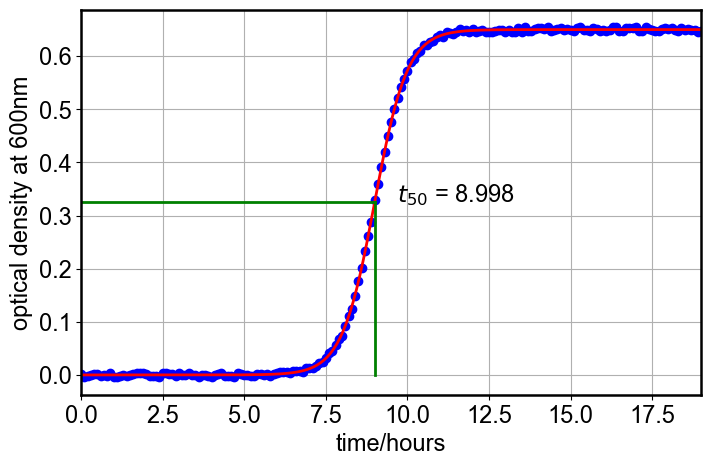

In [7]:
# plot results together

plt.plot(time,optical_density,'o',color='b')
plt.plot(x_fine, fit_y, '-', color='r')

plt.xlabel('time/hours')
plt.ylabel('optical density at 600nm')
plt.grid()

# get 50% y-value :
mid_x = popt[0]
mid_y = func(mid_x, popt[0], popt[1], popt[2] )
print(mid_y)

#----------------------------------------
# draw vertical line at mid_x
p50x = np.zeros(2)
p50x[0] = mid_x
p50x[1] = mid_x

p50y = np.zeros(2)
p50y[0] = 0
p50y[1] = mid_y

plt.plot(p50x, p50y, color='green')
#----------------------------------------
# horizontal line at mid_y
h50x = np.zeros(2)
h50x[0] = 0
h50x[1] = mid_x

h50y = np.zeros(2)
h50y[0] = mid_y
h50y[1] = mid_y
plt.plot(h50x, h50y, color='green')
#----------------------------------------
# modify xaxis limits
plt.xlim([int(np.min(time)), int(np.max(time))])
#----------------------------------------

# add annotation
message = '$t_{50}$ = '+str(np.round(popt[0], 3))
plt.annotate(message, [mid_x + (0.075*mid_x), mid_y],   xycoords='data')

#### From this analysis, we found the $t_{50}$ value from curve fitting. The $t_{50}$ is the time at which half of the maximum cell-growth took place. This value also has applications in other similar trends like percent saturation of haemologlobin with oxygen. 